# Biodiversity in US National Parks
The goal of this project was to examine conservation data from the National Parks Service and identify populations of organisms most in need of attention based on their conservation status.


### Objectives:
1. What is the biodiversity of each park like, what are the number of sightings of each category of organism in each park (for example, do some parks have more amphibians than mammals)?
2. Identify populations of organisms most in need of attention based on their conservation status. Conservation status in need of most attention to least attention is as follows:
    - Endangered > Threatened > Species of Concern > In Recovery > No Concern

In [367]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [368]:
observations = pd.read_csv('observations.csv')
species_info = pd.read_csv('species_info.csv')
species_info.fillna('No Concern', inplace=True)

In [369]:
print(observations.head())
print(species_info.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole          No Concern  
1                              American Bison, Bison          No Concern  
2  Aurochs, Aurochs, Domestic 

category                             Amphibian    Bird   Fish  Mammal  \
park_name                                                               
Bryce National Park                       7542   58590  12823   28830   
Great Smoky Mountains National Park       5876   42869   9482   21056   
Yellowstone National Park                19937  144300  31459   70701   
Yosemite National Park                   11713   86612  19137   42533   

category                             Nonvascular Plant  Reptile  \
park_name                                                         
Bryce National Park                              32992     8141   
Great Smoky Mountains National Park              24857     5841   
Yellowstone National Park                        83021    20061   
Yosemite National Park                           49783    11779   

category                             Vascular Plant  
park_name                                            
Bryce National Park                          48437

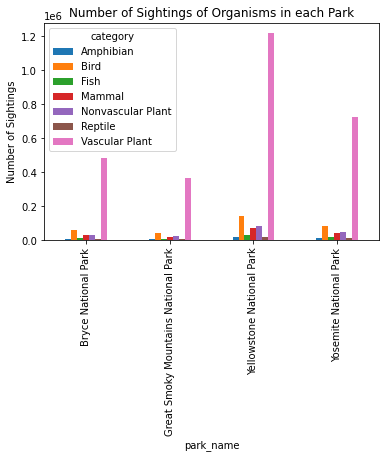

category                             Amphibian      Bird      Fish    Mammal  \
park_name                                                                      
Bryce National Park                   1.190922  9.251671  2.024820  4.552410   
Great Smoky Mountains National Park   1.237410  9.027656  1.996786  4.434121   
Yellowstone National Park             1.255762  9.088957  1.981493  4.453211   
Yosemite National Park                1.233659  9.122315  2.015584  4.479742   

category                             Nonvascular Plant   Reptile  \
park_name                                                          
Bryce National Park                           5.209611  1.285507   
Great Smoky Mountains National Park           5.234562  1.230039   
Yellowstone National Park                     5.229205  1.263573   
Yosemite National Park                        5.243340  1.240610   

category                             Vascular Plant  total_sightings  
park_name                              

<Figure size 432x288 with 0 Axes>

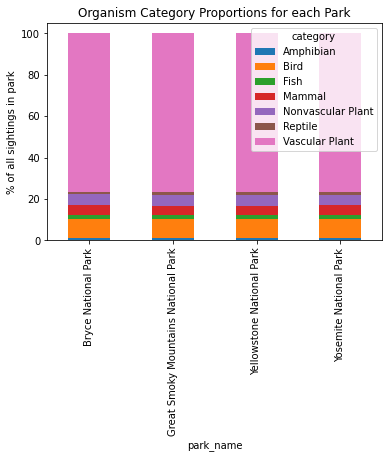

<Figure size 432x288 with 0 Axes>

In [379]:
observations_and_categories = pd.merge(observations, species_info[['category','scientific_name', 'conservation_status']], how='left')
categories_in_parks = observations_and_categories.groupby(['park_name', 'category'])['observations'].sum().unstack()
print(categories_in_parks)

categories_in_parks.plot(kind='bar')
plt.title('Number of Sightings of Organisms in each Park')
plt.ylabel('Number of Sightings')
plt.show()
plt.clf()


#Calculate percentage of population that each category of organism makes up for each park

categories_in_parks['total_sightings'] = categories_in_parks.sum(axis=1)
categories_in_parks.iloc[:,:-1] = categories_in_parks.iloc[:,:-1].div(categories_in_parks.total_sightings, axis=0)*100
print(categories_in_parks)

categories_in_parks.iloc[:,:-1].plot(kind='bar', stacked=True)
plt.title('Organism Category Proportions for each Park')
plt.ylabel('% of all sightings in park')
plt.show()
plt.clf()

In the first barplot it's apparent that vascular plants are the most sighted/observed organism across all parks, followed by birds. Yellowstone National Park appears to have the highest number of sightings/observations of all organisms out of all the parks.

Is the biodiversity similar for each park? In other words, is the proportion of sightings for each category of organisms similar across all parks? Looking at the second bar plot we see that indeed the proportion of sightings of each category of organism is quite similar across all parks, despite each park having different numbers of total sightings.

In [370]:
print(species_info.conservation_status.value_counts())

No Concern            5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64


Fortunately, it appears that the majority of species do NOT require protection (5633 species).

category             Amphibian  Bird  Fish  Mammal  Nonvascular Plant  \
conservation_status                                                     
Endangered                 1.0   4.0   3.0     7.0                0.0   
In Recovery                0.0   3.0   0.0     1.0                0.0   
Species of Concern         4.0  72.0   4.0    28.0                5.0   
Threatened                 2.0   0.0   4.0     2.0                0.0   

category             Reptile  Vascular Plant  
conservation_status                           
Endangered               0.0             1.0  
In Recovery              0.0             0.0  
Species of Concern       5.0            43.0  
Threatened               0.0             2.0  


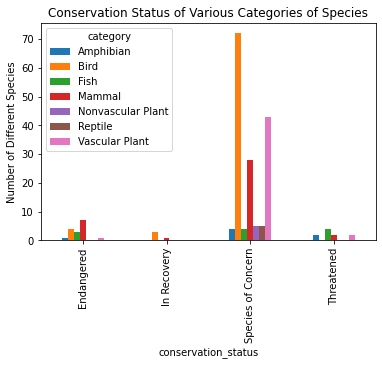

In [371]:
conservation = species_info[species_info.conservation_status != 'No Concern'].groupby(['conservation_status', 'category'])['scientific_name'].count().unstack()
conservation.fillna(0, inplace=True)

print(conservation)

ax = conservation.plot(kind='bar')
plt.title("Conservation Status of Various Categories of Species")
plt.ylabel("Number of Different Species")
plt.show()

The bar plot above examines the data of species that DO require protection (ie those species that are NOT "no concern"). It appears that special attention should be given to birds, mammals, and vascular plants, as the number of species of concern in each of these categories is approximately 70, 45, and 25 different species respectively.

In the endangered conservation status, it appears that the category mammals has the highest number of different species that are endangered.

            category  not_protected  protected  prop_protected  \
0          Amphibian             72          7        8.860759   
1               Bird            413         75       15.368852   
2               Fish            115         11        8.730159   
3             Mammal            146         30       17.045455   
4  Nonvascular Plant            328          5        1.501502   
5            Reptile             73          5        6.410256   
6     Vascular Plant           4216         46        1.079305   

   prop_not_protected  
0           91.139241  
1           84.631148  
2           91.269841  
3           82.954545  
4           98.498498  
5           93.589744  
6           98.920695  


Text(0.5, 1.0, 'Proportion of Protected Organisms in Each Category')

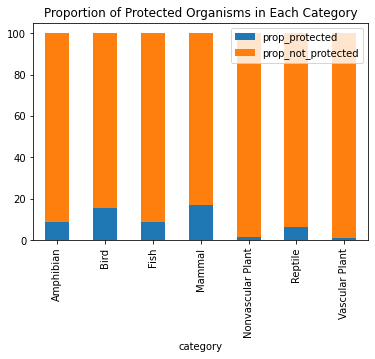

In [383]:
#Count of protected vs. no concern for each category of organism
species_info['is_protected'] = species_info.conservation_status != 'No Concern'

protection_counts = species_info.groupby(['is_protected', 'category']).scientific_name.nunique().reset_index().pivot(columns='is_protected', index='category', values='scientific_name').reset_index()

protection_counts.columns = ['category', 'not_protected', 'protected']

protection_counts['prop_protected'] = protection_counts.protected/(protection_counts.protected + protection_counts.not_protected)*100

protection_counts['prop_not_protected'] = 100 - protection_counts['prop_protected']

print(protection_counts)

protection_counts[['category','prop_protected','prop_not_protected']].set_index('category').plot(stacked=True, kind='bar')
plt.title('Proportion of Protected Organisms in Each Category')

In the previous bar plot we examined total counts of protected species, whereas in the above bar plot we are examining the proportion of protected species out of all species of each category.

In the previous plot we identified that birds, mammals, and vascular plants may require special attention. By examining the proportions we see at first glance that more attention should be given to the categories Mammal and Bird, rather than Vascular Plant. The percentage of mammals and birds that are endangered is nearly 20%, whereas less than 5% of vascular plants are at risk of endangerment (protected).

In [402]:
contingency = protection_counts[['category','not_protected','protected']]
print(contingency)

from scipy.stats import chi2_contingency


#Mammal vs Bird
chi2, pval, dof, expected = chi2_contingency([[146, 30],
[413, 75]])
print("\n Mammal vs Bird p-value = " + str(pval))

#Mammal vs Vascular Plant
chi2, pval, dof, expected = chi2_contingency([[146, 30],
[4216, 46]])
print("\n Mammal vs Vascular Plant p-value = " + str(pval))

#Mammal vs Reptile
chi2, pval, dof, expected = chi2_contingency([[146, 30],
[73, 5]])
print("\n Mammal vs Reptile p-value = " + str(pval))

#Mammal vs Fish
chi2, pval, dof, expected = chi2_contingency([[146, 30],
[115, 11]])
print("\n Mammal vs Fish p-value = " + str(pval))

#Bird vs Fish
chi2, pval, dof, expected = chi2_contingency([[413, 75],
[115, 11]])
print("\n Bird vs Fish p-value = " + str(pval))

#Bird vs Amphibian
chi2, pval, dof, expected = chi2_contingency([[413, 75],
[72, 7]])
print("\n Bird vs Amphibian p-value = " + str(pval))

#Reptile vs Vascular Plant
chi2, pval, dof, expected = chi2_contingency([[73, 5],
[4216, 46]])
print("\n Reptile vs Vascular Plant p-value = " + str(pval))

#Reptile vs Nonvascular Plant
chi2, pval, dof, expected = chi2_contingency([[73, 5],
[328, 5]])
print("\n Reptile vs Nonvascular Plant p-value = " + str(pval))

#Vascular Plant vs Nonvascular Plant
chi2, pval, dof, expected = chi2_contingency([[4216, 46],
[328, 5]])
print("\n Vascular Plant vs Nonvascular Plant p-value = " + str(pval))


            category  not_protected  protected
0          Amphibian             72          7
1               Bird            413         75
2               Fish            115         11
3             Mammal            146         30
4  Nonvascular Plant            328          5
5            Reptile             73          5
6     Vascular Plant           4216         46

 Mammal vs Bird p-value = 0.6875948096661336

 Mammal vs Vascular Plant p-value = 1.4405067309854046e-55

 Mammal vs Reptile p-value = 0.03835559022969898

 Mammal vs Fish p-value = 0.0561483484489001

 Bird vs Fish p-value = 0.07668199569057194

 Bird vs Amphibian p-value = 0.17593613249594683

 Reptile vs Vascular Plant p-value = 0.00014505215494675828

 Reptile vs Nonvascular Plant p-value = 0.0336269831072617

 Vascular Plant vs Nonvascular Plant p-value = 0.6623419491381985

 Vascular Plant vs Nonvascular Plant p-value = 0.7814504686518953


In the cell above we conducted a few chi square tests to identify whether there are significant differences between the protected proportions of each category of organism.

The results are as follows:
- Mammal, Bird, Fish, and Amphibian do NOT have significantly different protected proportions.
- Vascular Plant and Nonvascular Plant do NOT have significantly different protected proportions.
- Mammals DO HAVE significantly different protected proportions compared to Reptiles and Vascular Plants.
- Reptiles DO HAVE significantly different protected proportions compared to Nonvascular Plants and Vascular Plants.

Note that reptile, fish, and amphibian sample sizes are small (number of different species in these categories is few compared to the other categories).

### Conclusions
1. Biodiversity is similar across all parks, with similar proportions of each category of organism in each park. However, Yellowstone National Park has the greatest number of sightings of all organisms out of all the parks.
2. As for conservation status, the majority of species are "No Concern", meaning they require no protection/attention and are not at risk of endangerment. Out of species that require protection (ie those that are NOT "No Concern"), most species are "Species of Concern", meaning they should be watched as they are at a greater risk of endangerment than species of "No Concern".
3. Which category of species should be watched most closely to protect against endangerment? Nearly 20% of birds and mammals are protected (ie NOT "no concern"), and nearly 10% of amphibians and fish are protected, as compared to less than 2% of vascular and nonvascular plants are protected. Given our chi2 tests, which indicated significant difference between mammals, birds, fish, and amphibians against vascular and nonvascular plants, we suggest paying particular attention to the following categories of species:
    - Mammals, Birds, Fish, and Amphibians. 